# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
from tweepy import OAuthHandler
from timeit import default_timer as timer
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_1 =pd.read_csv('twitter_archive_enhanced.csv')
df_1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
open('image_predictions.tsv', 'wb').write(requests.get(url).content)

335079

In [4]:
df_image = pd.read_csv('image_predictions.tsv',sep='\t')

In [5]:
df_image.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
#print(end - start)
#print(fails_dict)


In [6]:
df_json = pd.read_json('tweet-json.txt', lines = True)

In [7]:
df_json.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [8]:
df_2 = df_json[['id', 'retweet_count', 'favorite_count']]
df_2

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [13]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [14]:
df_1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
70,879008229531029506,NaN,NaN,2017-06-25 16:07:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Beau. That is Beau's balloon. He takes it everywhere. 13/10 would protect at all costs https://t.co/YDtpCjIPKN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879008229531029506/photo/1,13,10,Beau,None,None,None,None
562,802600418706604034,NaN,NaN,2016-11-26 19:50:26 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Bailey. She has mastered the head tilt. 11/10 rather h*ckin adorable https://t.co/urhl90ZE1O,NaN,NaN,NaN,https://vine.co/v/5FwUWjYaW0Y,11,10,Bailey,None,None,None,None
973,750071704093859840,NaN,NaN,2016-07-04 21:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Pause your cookout and admire this pupper's nifty hat. 10/10 https://t.co/RG4C9IdNJM,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/750071704093859840/photo/1,https://twitter.com/dog_rates/status/750071704093859840/photo/1,https://twitter.com/dog_rates/status/750071704093859840/photo/1",10,10,None,None,None,pupper,None
1941,673715861853720576,NaN,NaN,2015-12-07 04:09:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a heavily opinionated dog. Loves walls. Nobody knows how the hair works. Always ready for a kiss. 4/10 https://t.co/dFiaKZ9cDl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673715861853720576/photo/1,4,10,a,None,None,None,None
2240,667924896115245057,NaN,NaN,2015-11-21 04:37:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jiminy. He has always wanted to be a cheerleader. Can jump high enough to get on other dog. Go Jiminy. 9/10 https://t.co/fW6kIPFGD2,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667924896115245057/photo/1,9,10,Jiminy,None,None,None,None


In [15]:
df_1.name.value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Oliver             11
Lucy               11
Penny              10
Lola               10
Tucker             10
Bo                  9
Winston             9
Sadie               8
the                 8
an                  7
Toby                7
Bailey              7
Daisy               7
Buddy               7
Scout               6
Oscar               6
Milo                6
Leo                 6
Jax                 6
Koda                6
Jack                6
Bella               6
Stanley             6
Dave                6
Rusty               6
George              5
Alfie               5
Finn                5
Bentley             5
Oakley              5
Louis               5
very                5
Larry               5
Phil                5
Sammy               5
Gus                 5
Sunny               5
Chester             5
Hank                4
Maddie              4
Moose               4
Brody     

In [16]:
df_1.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

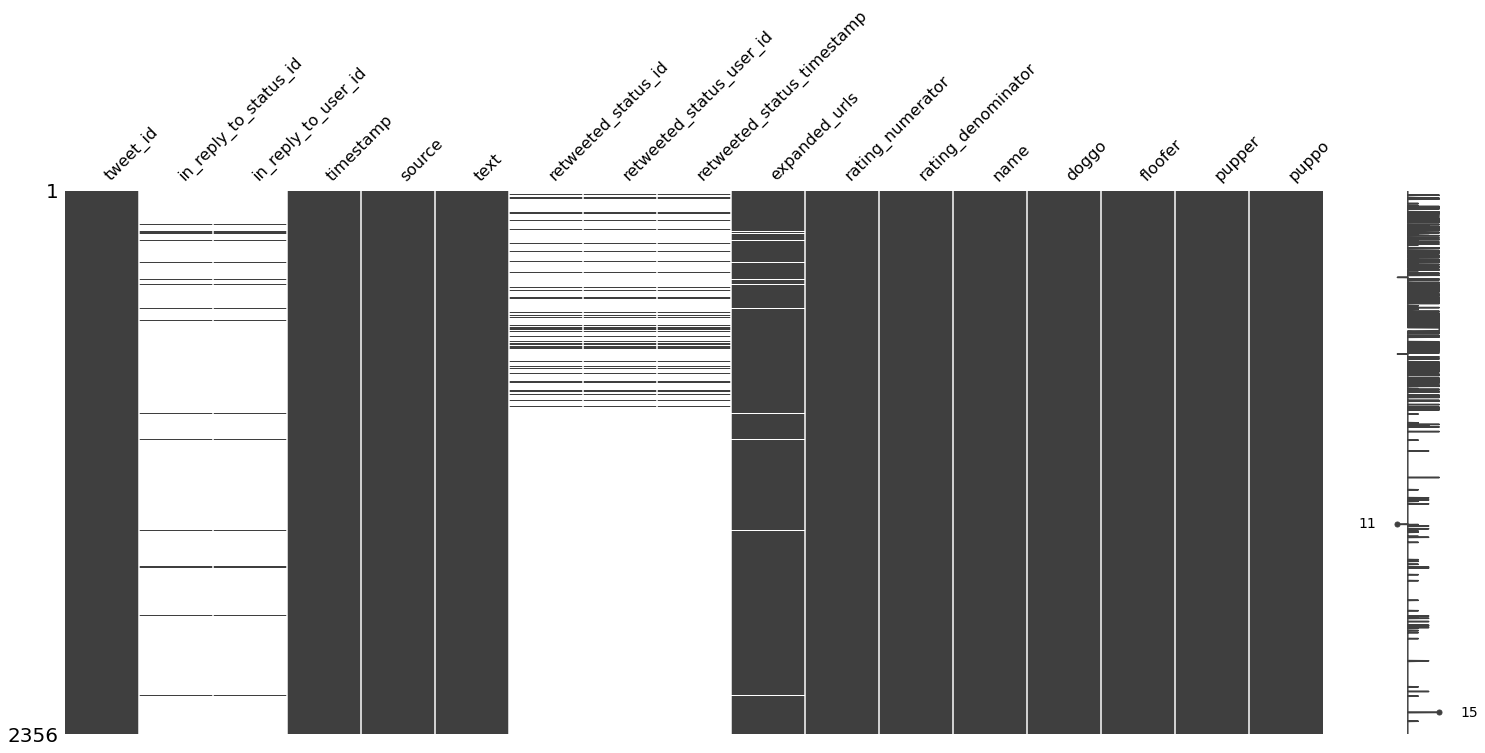

In [17]:
msno.matrix(df_1)
plt.show()

In [18]:
# count of rows where the name value is incorrect (contains messy_names, or all lower case )
Messy_Names = ['None,', 'a', 'an', 'the', 'O', 'my', 'by', 'one', 'his']
df_1[df_1['name'].str.islower() | df_1['name'].isin(Messy_Names)]['name'].count()

110

In [19]:
df_1[df_1['rating_denominator'] != 10]['rating_denominator'].value_counts()

50     3
11     3
20     2
80     2
0      1
110    1
120    1
150    1
15     1
16     1
130    1
170    1
40     1
7      1
70     1
2      1
90     1
Name: rating_denominator, dtype: int64

In [20]:
Messy_pics = ["dont send", "don't send", "do not send", "Dont send", "Don't send", "Do not send"]
df_1[df_1['text'].str.contains('|'.join(Messy_pics))]['text'].count()


15

In [21]:
df_1[df_1.text.str.contains('(\d)+\.(\d)+/(\d)+')]['text'].count()

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


6

In [22]:
df_1.timestamp.max()

'2017-08-01 16:23:56 +0000'

### Quality issues
1.Incorrect Names: the incorrect names shall be replaced either extracting them from the 'text' column, if not available, shall be replaced with NaN.

2.Timestamp: extra +0000 values in timestamp column to be removed. 

3.Drop rows: where they contain 'dont send' in 'text' column as they are irrelevant photos for rating. 

4.Drop rows: In order to have original rating, replies and retweets should be droped. 

5.Timestamp column type to be reassigned properly.

6.Nulls are defined as 'None' in several columns, shall be replaced with 'NaN'.

7.ID fields dtype to be reassigned to object.

8.Incorrect ratings extracted from 'text' column. 

9.Removing columns to be more approprate. 

10.Renaming columns to be more appropriate. 

11.Numerator and denominator dtypes to be reassigned to float 

### Tidiness issues
1.Combining three dataframes into one master dataframe with appropriate data. 

2.Data in four dog columns:  'doggo', 'floofer', 'pupper' and 'puppo' shall be into one category column.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [23]:
# Make copies of original pieces of data
df_1_clean  = df_1.copy()
df_image_clean = df_image.copy()
df_2_clean = df_2.copy()


### Issue #1: Combining three scattered dataframes into one master dataframe with appropriate data

#### Define: To join the dataframes into one on tweet id as master key

#### Code

In [24]:
df_2_clean.rename(columns = {"id" : "tweet_id"}, inplace = True)


In [25]:
df_master_clean = df_1_clean.merge(df_image_clean,on='tweet_id').merge(df_2_clean,on='tweet_id')


#### Test

In [26]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

### Issue #2: Incorrect Names: the incorrect names shall be replaced either extracting them from the 'text' column, if not available, shall be replaced with NaN.

#### Define: A function shall be applied to extract names from 'text' column contains 'named_____' or 'name is ____' and replace it with the incorrect names in the dataframe. If such is not available, then replace it with NaN.

#### Code

In [27]:
Messy_Names = ['None', 'a', 'an', 'the', 'O', 'my', 'by', 'one', 'his']
names = [] 
def replace_name(row):
    if ( row['name'] == 'None' or row['name'].islower() or row['name'] in(Messy_Names)) and 'named' in row['text']:
        p = re.compile('named ([a-zA-z]+)')
        names.append(p.search(row['text']).group(1))
    elif ( row['name'] == 'None' or row['name'].islower() or row['name'] in(Messy_Names)) and 'name is' in row['text']:
        p = re.compile('name is ([a-zA-z]+)')
        names.append(p.search(row['text']).group(1))
    elif row['name'] == 'None'  or row['name'].islower() or row['name'] in(Messy_Names):
        names.append(np.nan)
    else:
        names.append(row['name']) 

df_master_clean.apply(replace_name, axis=1)
df_master_clean['name'] = names

#### Test

In [28]:
Messy_Names = ['None', 'a', 'an', 'the', 'O', 'my', 'by', 'one', 'his']
df_master_clean[df_master_clean['name'].str.islower() | df_master_clean['name'].isin(Messy_Names)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


### Issue #3: Timestamp: extra +0000 values in timestamp column to be removed. 

#### Define: A function to drop "+0000" from timestamp 

#### Code:

In [29]:
new_timestamp = [] 
def exract_timestamp(row):
    p = re.compile('(.*)\+0000')
    new_timestamp.append(p.search(row['timestamp']).group(1))

df_master_clean.apply(exract_timestamp, axis=1)
df_master_clean['timestamp'] = new_timestamp


#### Test:

In [30]:
df_master_clean[(df_master_clean['timestamp'].str.contains('\+0000'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


### Issue #4: Drop rows: where they contain 'dont send' in 'text' column as they are irrelevant photos for rating. 

#### Define: such rows shall be removed from the dataframe. 

#### Code: 

In [31]:
Messy_pics = ["dont send", "don't send", "do not send", "Dont send", "Don't send", "Do not send"]
df_master_clean = df_master_clean[~df_master_clean['text'].str.contains('|'.join(Messy_pics))]

#### Test:

In [32]:
Messy_pics = ["dont send", "don't send", "do not send", "Dont send", "Don't send", "Do not send"]
df_master_clean[df_master_clean['text'].str.contains('|'.join(Messy_pics))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


### Issue #5: Drop rows: In order to have original rating, replies and retweets should be droped.

#### Define: drop rows with 'in_reply_to_status_id' is not NaN then 'retweeted_status_id' is not NaN

#### Code: 

In [36]:
df_master_clean = df_master_clean[((pd.isnull(df_master_clean['retweeted_status_id'])))]
df_master_clean = df_master_clean[(pd.isnull(df_master_clean['in_reply_to_status_id']))]

#### Test:

In [37]:
df_master_clean[(pd.notnull(df_master_clean['in_reply_to_status_id']))]['name'].count(),df_master_clean[((pd.notnull(df_master_clean['retweeted_status_id'])))]['name'].count()


(0, 0)

### Issue #6: Date data types to be reassigned properly.

#### Define: 'timestamp' column format is not appropriate.

#### Code:

In [38]:
df_master_clean['timestamp'] = pd.to_datetime(df_master_clean['timestamp'])

#### Test: 

In [39]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1957 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   1957 non-null   datetime64[ns]
 4   source                      1957 non-null   object        
 5   text                        1957 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               1957 non-null   object        
 10  rating_numerator            1957 non-null   int64         
 11  rating_denominator          1957 non-null   int64       

### Issue #7: Nulls are defined as 'None' in several columns, shall be replaced with 'NaN'.

#### Define: Replace 'None' with np.nan in  'doggo', 'floofer', 'pupper','puppo' colunms.

#### Code:

In [40]:
doggo = []
floofer = []
pupper = []
puppo = []
def replace_none(row):
    if ( row['doggo'] == 'None' ):
        doggo.append(np.nan)
    else:
        doggo.append(row['doggo'])
        
    if ( row['floofer'] == 'None' ):
        floofer.append(np.nan)
    else:
        floofer.append(row['floofer'])
        
    if ( row['pupper'] == 'None' ):
        pupper.append(np.nan)
    else:
        pupper.append(row['pupper'])
        
    if ( row['puppo'] == 'None' ):
        puppo.append(np.nan)
    else:
        puppo.append(row['puppo'])
    
df_master_clean.apply(replace_none, axis=1)
df_master_clean['doggo'] = doggo
df_master_clean['floofer'] = floofer
df_master_clean['pupper'] = pupper
df_master_clean['puppo'] = puppo


#### Test:

In [41]:
df_master_clean[ (df_master_clean['doggo'] == 'None')| (df_master_clean['floofer'] == 'None') |(df_master_clean['pupper'] == 'None')|(df_master_clean['puppo'] == 'None')]['name'].count()


0

### Issue #8: ID fields dtype to be reassigned to object.

#### Define: 
The ID fields, like tweet_id, in_reply_to_status_id etc. should be objects, not integers or floats because they are not numeric and aren't intended to perform calculations.

#### Code:

In [42]:
df_master_clean = df_master_clean.astype({'tweet_id' : object, 'in_reply_to_status_id':object, 'in_reply_to_user_id':object,
                                         'retweeted_status_id': object, 'retweeted_status_user_id': object})

#### Test:

In [43]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1957 non-null   object        
 1   in_reply_to_status_id       0 non-null      object        
 2   in_reply_to_user_id         0 non-null      object        
 3   timestamp                   1957 non-null   datetime64[ns]
 4   source                      1957 non-null   object        
 5   text                        1957 non-null   object        
 6   retweeted_status_id         0 non-null      object        
 7   retweeted_status_user_id    0 non-null      object        
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               1957 non-null   object        
 10  rating_numerator            1957 non-null   int64         
 11  rating_denominator          1957 non-null   int64       

### Issue # 9: Incorrect rating values extracted from the 'text' column

#### Define: 
Some of the values of the rating, either numerator or denominator are not extracted appropriately from the 'text' column. 
 - tweet_id 740373189193256964 should be 14/10 instead of 9/11
 - tweet_id 722974582966214656 should be 13/10 instead of 4/20
 - tweet_id 716439118184652801 should be 11/10 instead of 50/50
 - tweet_id 682962037429899265 should be 10/10 instead of 7/11
 - tweet_id 666287406224695296 should be 9/10 instead of 1/2
 - tweet_id 883482846933004288 should be 14/10 instead of 5/10
 - tweet_id 786709082849828864 should be 10/10 instead of 75/10
 - tweet_id 778027034220126208 should be 11/10 instead of 27/10
 - tweet_id 680494726643068929 should be 11/10 instead of 26/10
- tweet_id 749981277374128128 will be removed (1776/10) improper rating
- tweet_id 670842764863651840 will be removed (420/10) improper rating
- tweet_id 810984652412424192 will be removed (24/7) improper rating





In [44]:
df_master_clean[df_master_clean.text.str.contains('(\d)+\.(\d)+/(\d)+')][['tweet_id','text','rating_numerator','rating_denominator']]


C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
40,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
558,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
614,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1451,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [45]:
ids = [740373189193256964,722974582966214656,716439118184652801, 682962037429899265, 666287406224695296, 810984652412424192]
df_master_clean[df_master_clean.tweet_id.isin(ids)][['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
415,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
876,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
967,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1001,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1405,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11
2052,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2


In [46]:
df_master_clean[df_master_clean['rating_numerator'] >30]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
345,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,3716,13518
558,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,7069,20296
734,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,2539,5316
802,749981277374128128,NaN,NaN,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,2772,5569
924,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,1434,4196
1001,716439118184652801,NaN,NaN,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,247,2574
1022,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,829,3062
1047,710658690886586372,NaN,NaN,2016-03-18 02:46:49,"<a href=""http://twi

#### Code:

In [47]:
df_master_clean.loc[df_master_clean.tweet_id == 883482846933004288 ,'rating_numerator'] = 14
df_master_clean.loc[df_master_clean.tweet_id == 786709082849828864 ,'rating_numerator'] = 10
df_master_clean.loc[df_master_clean.tweet_id == 778027034220126208 ,'rating_numerator'] = 11
df_master_clean.loc[df_master_clean.tweet_id == 680494726643068929 ,'rating_numerator'] = 11

df_master_clean.loc[df_master_clean.tweet_id == 740373189193256964 ,'rating_denominator'] = 10
df_master_clean.loc[df_master_clean.tweet_id == 740373189193256964 ,'rating_numerator'] = 14

df_master_clean.loc[df_master_clean.tweet_id == 722974582966214656 ,'rating_denominator'] = 10
df_master_clean.loc[df_master_clean.tweet_id == 722974582966214656 ,'rating_numerator'] = 13

df_master_clean.loc[df_master_clean.tweet_id == 716439118184652801 ,'rating_denominator'] = 10
df_master_clean.loc[df_master_clean.tweet_id == 716439118184652801 ,'rating_numerator'] = 11

df_master_clean.loc[df_master_clean.tweet_id == 682962037429899265 ,'rating_denominator'] = 10
df_master_clean.loc[df_master_clean.tweet_id == 682962037429899265 ,'rating_numerator'] = 10

df_master_clean.loc[df_master_clean.tweet_id == 666287406224695296 ,'rating_denominator'] = 10
df_master_clean.loc[df_master_clean.tweet_id == 666287406224695296 ,'rating_numerator'] = 9

In [48]:
df_master_clean.drop(df_master_clean[df_master_clean['tweet_id'] == 749981277374128128].index, inplace = True)
df_master_clean.drop(df_master_clean[df_master_clean['tweet_id'] == 670842764863651840].index, inplace = True)
df_master_clean.drop(df_master_clean[df_master_clean['tweet_id'] == 810984652412424192].index, inplace = True)



#### Test:

In [49]:
df_master_clean[df_master_clean.text.str.contains('(\d)+\.(\d)+/(\d)+')][['tweet_id','text','rating_numerator','rating_denominator']]


C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
40,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",14,10
558,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",10,10
614,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11,10
1451,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11,10


In [50]:
ids = [740373189193256964,722974582966214656,716439118184652801, 682962037429899265, 666287406224695296]
df_master_clean[df_master_clean.tweet_id.isin(ids)][['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
876,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14,10
967,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13,10
1001,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11,10
1405,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,10,10
2052,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9,10


In [51]:
df_master_clean[df_master_clean['rating_numerator'] >30]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
345,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,3716,13518
734,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,2539,5316
924,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,1434,4196
1022,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,829,3062
1047,710658690886586372,NaN,NaN,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,636,2529
1065,709198395643068416,NaN,NaN,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True,721,2634
1131,704054845121142784,NaN,NaN,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True,1028,3201
1207,697463031882764288,NaN,NaN,2016

### Issue # 10: Data in four dog columns: 'doggo', 'floofer', 'pupper' and 'puppo' shall be into one category column.

#### Define: A function will be applied that assign the correct dog stage to each tweet,  'multiple' will be a new cateogry if we have multiple dog breeds for tweet and NaN if there is no breed defined. 

#### Code: 

In [52]:
dog_stage = [] 
def exract_dog_stage(row):
    stage = []
    if row['doggo'] is not np.nan:
        stage.append(row['doggo'])
    if row['floofer'] is not np.nan:
        stage.append(row['floofer'])
    if row['pupper'] is not np.nan:
        stage.append(row['pupper'])
    if row['puppo'] is not np.nan:
        stage.append(row['puppo'])
    if len(stage) > 1 :
        dog_stage.append('multiple')
    elif len(stage) == 0:
        dog_stage.append(np.nan)
    else:
        dog_stage.append(stage[0])


df_master_clean.apply(exract_dog_stage, axis=1)
df_master_clean['dog_stage'] = dog_stage


In [53]:
df_master_clean['dog_stage'].value_counts()

pupper      201
doggo        63
puppo        22
multiple     10
floofer       7
Name: dog_stage, dtype: int64

In [54]:
df_master_clean[(df_master_clean['dog_stage'] == 'multiple')][['tweet_id','text','doggo','puppo','floofer','pupper','dog_stage']]

 

,tweet_id,text,doggo,puppo,floofer,pupper,dog_stage
154,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggo,puppo,NaN,NaN,multiple
160,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggo,NaN,floofer,NaN,multiple
366,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",doggo,NaN,NaN,pupper,multiple
429,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggo,NaN,NaN,pupper,multiple
464,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggo,NaN,NaN,pupper,multiple
566,785639753186217984,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,doggo,NaN,NaN,pupper,multiple
722,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",doggo,NaN,NaN,pupper,multiple
780,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,doggo,NaN,NaN,pupper,multiple
871,741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggo,NaN,NaN,pupper,multiple
917,733109485275860992,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggo,NaN,NaN,pupper,multiple


In [55]:
df_master_clean[((df_master_clean['dog_stage'].isna()) & df_master_clean['text'].str.contains('pupp|floof'))][['tweet_id','text','dog_stage']]


,tweet_id,text,dog_stage
24,887101392804085760,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN
43,882992080364220416,This is Rusty. He wasn't ready for the first pic. Clearly puppared for the second. 13/10 confirmed great boy https://t.co/tyER0KpdXj,NaN
48,881906580714921986,This is Rey. He's a Benebop Cumberfloof. 12/10 dangerously pettable https://t.co/503CgWbhxQ,NaN
49,881666595344535552,This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s,NaN
65,878057613040115712,This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe,NaN
73,876120275196170240,"Meet Venti, a seemingly caffeinated puppoccino. She was just informed the weekend would include walks, pats and scritches. 13/10 much excite https://t.co/ejExJFq3ek",NaN
90,871879754684805121,Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorable. Proudly supupporting her owner. 13/10 https://t.co/uK6PNyeh9w,NaN
111,866686824827068416,This is Lili. She can't believe you betrayed her with bath time. Never looking you in the eye again. 12/10 would puppologize profusely https://t.co/9b9J46E86Z,NaN
116,865006731092295680,This is Nelly. He really hopes you like his Hawaiian shirt. He already tore the tags off. 13/10 h*ck of a puppurchase https://t.co/LbkG5CiM7o,NaN
187,847962785489326080,This is Georgie. He's very shy. Only puppears when called. Aggressively average at fetch. Unique front paws. Looks slippery. 10/10 would pet https://t.co/rcDs5LkiSj,NaN


### Issue # 11: After testing issue #9

#### Define: 
- some tweet texts contains 'floof', 'Floof', 'floofs', or 'Floofs' while they are not categorized as 'floofer' 
- some tweet texts contains 'puppers', 'Puppers' while they are not categorized as 'pupper'
- tweet_id 817777686764523521 was wrongly classified as doggo while it is 'pupper'
- tweet_id 855851453814013952 was wrongly classified as 'doggo' while it is 'puppo'
- tweet_id 854010172552949760 was wrongly classified as 'doggo' whilt it is 'floofer'

#### Code:

In [56]:
dog_stage = [] 
def extract_stage(row):
    if  'floof' in row['text']:
        dog_stage.append('floofer')
    elif  'puppers' in row['text']:
        dog_stage.append('pupper')
    else:
        dog_stage.append(row['dog_stage'])
df_master_clean.apply(extract_stage, axis=1)
df_master_clean['dog_stage'] = dog_stage

In [57]:
df_master_clean.loc[df_master_clean.tweet_id == 817777686764523521 ,'dog_stage'] = 'pupper'

df_master_clean.loc[df_master_clean.tweet_id == 855851453814013952 ,'dog_stage'] = 'puppo'

df_master_clean.loc[df_master_clean.tweet_id == 854010172552949760 ,'dog_stage'] = 'floofer'


#### Test:

In [58]:
df_master_clean[( df_master_clean['text'].str.contains('floof|puppers'))][['tweet_id','text','dog_stage']]

,tweet_id,text,dog_stage
24,887101392804085760,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,floofer
41,883360690899218434,Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,floofer
48,881906580714921986,This is Rey. He's a Benebop Cumberfloof. 12/10 dangerously pettable https://t.co/503CgWbhxQ,floofer
345,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,floofer
469,800388270626521089,This is Doc. He takes time out of every day to worship our plant overlords. 12/10 quite the floofer https://t.co/azMneS6Ly5,floofer
497,796080075804475393,This is Yogi. He's 98% floof. Snuggable af. 12/10 https://t.co/opoXKxmfFm,floofer
505,794332329137291264,This is Nimbus (like the cloud). He just bought this fancy af duck raincoat. Only protects one ear tho. 12/10 so h*ckin floofy https://t.co/SIQbb8c3AU,floofer
596,780543529827336192,Here's a perturbed super floof. 12/10 would snug so damn well https://t.co/VG095mi09Q,floofer
623,776218204058357768,Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath https://t.co/nzqTNw0744,floofer
637,773922284943896577,"This is Heinrich (pronounced ""Pat""). He's a Botswanian Vanderfloof. Snazzy af bandana. 12/10 downright puptacular https://t.co/G56ikYAqFg",floofer


In [59]:
ids = [817777686764523521,855851453814013952,854010172552949760]
df_master_clean[df_master_clean.tweet_id.isin(ids)][['tweet_id','text','dog_stage']]


,tweet_id,text,dog_stage
154,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,puppo
160,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",floofer
366,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",pupper


### Issue # 12: removing columns

#### Define:
After introducing new column as 'dog_stage', there is no need to keep other four columns: 'doggo', 'floofer', 'pupper' and 'puppo' columns. Besides that columns with the highest number of empty cells such as: 
- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp
will be removed. 

#### Code:

In [60]:
df_master_clean = df_master_clean.drop(['doggo', 'floofer', 'pupper' , 'puppo', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test:

In [61]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1954 non-null   object        
 1   timestamp           1954 non-null   datetime64[ns]
 2   source              1954 non-null   object        
 3   text                1954 non-null   object        
 4   expanded_urls       1954 non-null   object        
 5   rating_numerator    1954 non-null   int64         
 6   rating_denominator  1954 non-null   int64         
 7   name                1375 non-null   object        
 8   jpg_url             1954 non-null   object        
 9   img_num             1954 non-null   int64         
 10  p1                  1954 non-null   object        
 11  p1_conf             1954 non-null   float64       
 12  p1_dog              1954 non-null   bool          
 13  p2                  1954 non-null   object      

### Issue # 13: Renaming Columns

#### Define: 
- Rename columns to be more appropriate:
  - 'timestamp' : 'tweet_timestamp'
  - 'text' : 'tweet_text'
  - 'name' : 'dog_name'
  - 'p1' : 'dog_breed_1st_prediction'
  - 'p1_conf' : 'prediction_confidence_1stguess'
  - 'p2' : 'dog_breed_2nd_prediction'
  - 'p2_conf' : 'prediction_confidence_2ndguess'
  - 'p3' : 'dog_breed_3rd_prediction'
  - 'p3_conf' : 'prediction_confidence_3rdguess'

#### Code:

In [62]:
df_master_clean.rename(columns={'timestamp' : 'tweet_timestamp',
       'text' : 'tweet_text', 'name' : 'dog_name', 'p1' : 'dog_breed_1st_prediction', 'p1_conf' : 'prediction_confidence_1stguess', 
                                'p2' : 'dog_breed_2nd_prediction', 'p2_conf' : 'prediction_confidence_2ndguess',
                                'p3' : 'dog_breed_3rd_prediction', 'p3_conf' : 'prediction_confidence_3rdguess'}, inplace=True)



#### Test:

In [63]:
df_master_clean.head()

,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,jpg_url,img_num,dog_breed_1st_prediction,prediction_confidence_1stguess,p1_dog,dog_breed_2nd_prediction,prediction_confidence_2ndguess,p2_dog,dog_breed_3rd_prediction,prediction_confidence_3rdguess,p3_dog,retweet_count,favorite_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,NaN


### Issue #14: numerator and denominator dtypes to be reassigned to float

#### Define:
numerator and denominator columns are subject for further analysis and is preferred to be reassigned to float.

#### Code:

In [64]:
df_master_clean = df_master_clean.astype({'rating_numerator': float, 'rating_denominator': float})

In [65]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   tweet_id                        1954 non-null   object        
 1   tweet_timestamp                 1954 non-null   datetime64[ns]
 2   source                          1954 non-null   object        
 3   tweet_text                      1954 non-null   object        
 4   expanded_urls                   1954 non-null   object        
 5   rating_numerator                1954 non-null   float64       
 6   rating_denominator              1954 non-null   float64       
 7   dog_name                        1375 non-null   object        
 8   jpg_url                         1954 non-null   object        
 9   img_num                         1954 non-null   int64         
 10  dog_breed_1st_prediction        1954 non-null   object        
 11  pred

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [66]:
df_master_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [67]:
dog_rating_ratio = [] 
def extract_dog_rating_ratio(row):
    stage = []
    dog_rating_ratio.append(row['rating_numerator'] /row['rating_denominator'])

df_master_clean.apply(extract_dog_rating_ratio, axis=1)
df_master_clean['dog_rating_ratio'] = dog_rating_ratio

In [68]:
df_master_clean.columns

Index(['tweet_id', 'tweet_timestamp', 'source', 'tweet_text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'dog_name', 'jpg_url',
       'img_num', 'dog_breed_1st_prediction', 'prediction_confidence_1stguess',
       'p1_dog', 'dog_breed_2nd_prediction', 'prediction_confidence_2ndguess',
       'p2_dog', 'dog_breed_3rd_prediction', 'prediction_confidence_3rdguess',
       'p3_dog', 'retweet_count', 'favorite_count', 'dog_stage',
       'dog_rating_ratio'],
      dtype='object')

In [69]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 2072
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   tweet_id                        1954 non-null   object        
 1   tweet_timestamp                 1954 non-null   datetime64[ns]
 2   source                          1954 non-null   object        
 3   tweet_text                      1954 non-null   object        
 4   expanded_urls                   1954 non-null   object        
 5   rating_numerator                1954 non-null   float64       
 6   rating_denominator              1954 non-null   float64       
 7   dog_name                        1375 non-null   object        
 8   jpg_url                         1954 non-null   object        
 9   img_num                         1954 non-null   int64         
 10  dog_breed_1st_prediction        1954 non-null   object        
 11  pred

In [70]:
df_master_clean.dog_rating_ratio.describe()

count    1954.000000
mean        1.054401
std         0.216294
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         1.400000
Name: dog_rating_ratio, dtype: float64

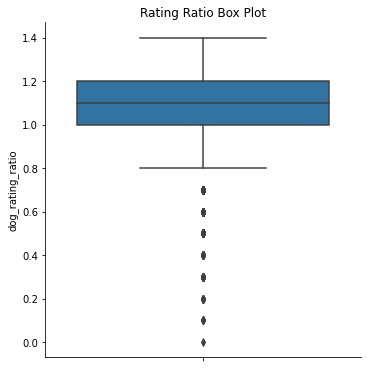

In [71]:
g = sns.catplot(y = 'dog_rating_ratio', data = df_master_clean, kind = 'box')
plt.title('Rating Ratio Box Plot')
plt.show()


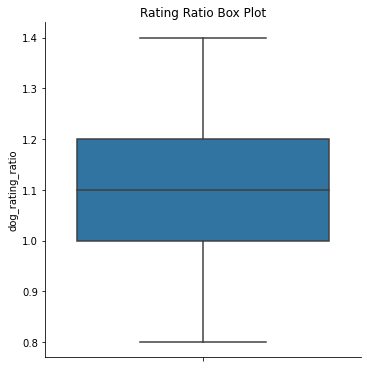

In [72]:
g = sns.catplot(y = 'dog_rating_ratio', data = df_master_clean, kind = 'box', sym= "")
plt.title('Rating Ratio Box Plot')
plt.show()


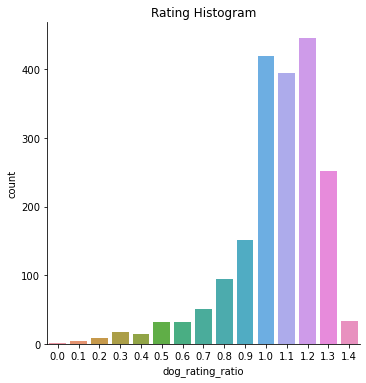

In [73]:
g = sns.catplot(x = 'dog_rating_ratio', data = df_master_clean, kind = 'count')
g.set_xticklabels(rotation = 0)
plt.title('Rating Histogram')
plt.show()


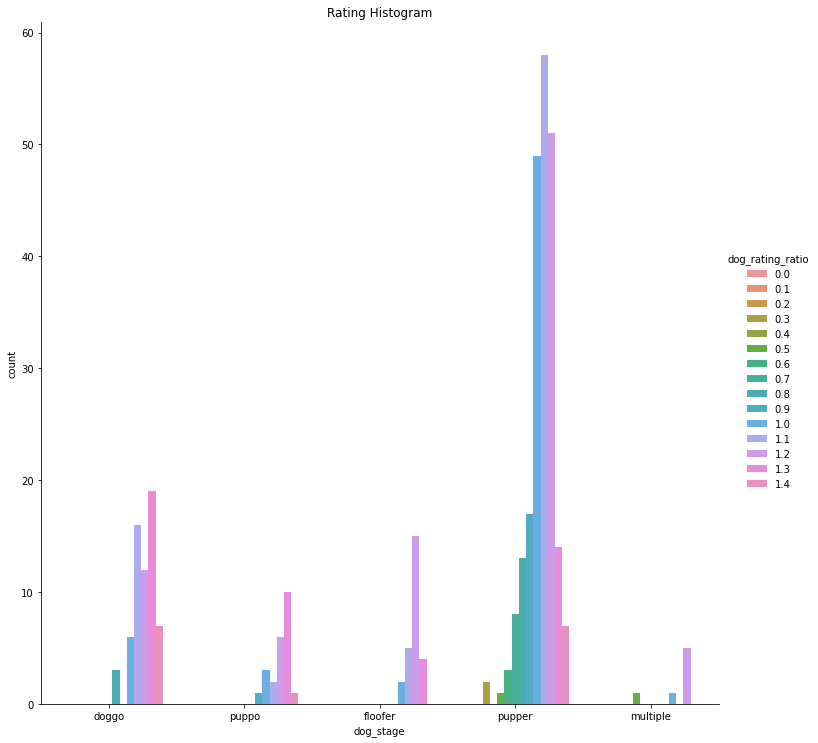

In [74]:
g = sns.catplot(x = 'dog_stage', data = df_master_clean, kind = 'count', height = 10, hue = 'dog_rating_ratio' )
plt.title('Rating Histogram')
plt.show()


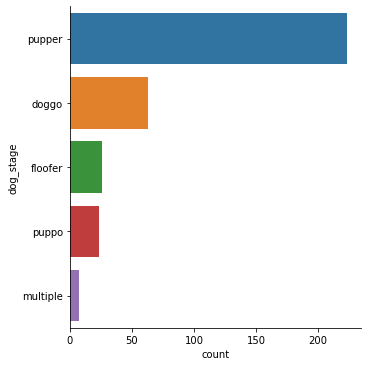

In [75]:
g = sns.catplot(y = 'dog_stage', data = df_master_clean, kind = 'count', order =df_master_clean['dog_stage'].value_counts().iloc[:10].index)
plt.show()

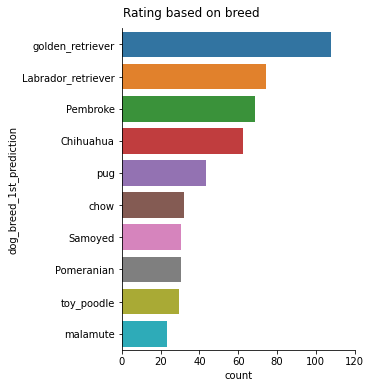

In [76]:
g = sns.catplot(y = 'dog_breed_1st_prediction', data = df_master_clean, kind = 'count', order = df_master_clean.groupby('dog_breed_1st_prediction').count()['dog_rating_ratio'].sort_values().nlargest(10).index )
g.fig.suptitle('Rating based on breed', y = 1.03)
g.set_xticklabels(rotation = 0)
plt.show()

In [77]:
order = df_master_clean.groupby('dog_breed_1st_prediction').count().shape
order

(370, 22)

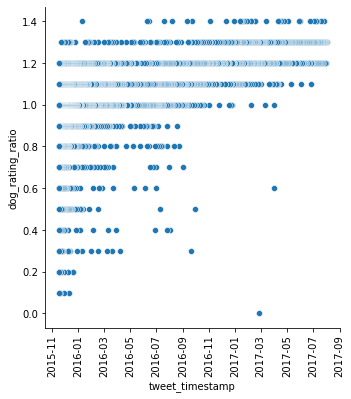

In [78]:
g = sns.relplot(x = 'tweet_timestamp', y = 'dog_rating_ratio', data = df_master_clean,  kind = 'scatter')
g.set_xticklabels(rotation = 90)

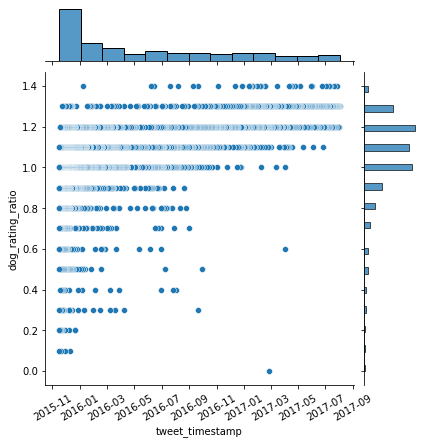

In [79]:
g = sns.jointplot(data=df_master_clean, x = 'tweet_timestamp', y = 'dog_rating_ratio')
for tick in g.ax_joint.get_xticklabels():tick.set_rotation(30)

In [80]:
df_master_clean.groupby('dog_breed_1st_prediction').count()['dog_rating_ratio'].sort_values().nlargest(10)

dog_breed_1st_prediction
golden_retriever      135
Labrador_retriever     93
Pembroke               86
Chihuahua              78
pug                    54
chow                   40
Samoyed                38
Pomeranian             38
toy_poodle             37
malamute               29
Name: dog_rating_ratio, dtype: int64

In [81]:
df_v1 = df_master_clean.query('p1_dog == True')
df_v2 = df_v1.filter(['dog_breed_1st_prediction', 'favorite_count'])
df_v3 = df_v2.groupby('dog_breed_1st_prediction').mean()
df_v3['favorite_count'].sort_values().nlargest(10)

dog_breed_1st_prediction
Saluki                     24060.000000
French_bulldog             18044.960000
Afghan_hound               17326.666667
giant_schnauzer            17314.500000
black-and-tan_coonhound    17012.000000
flat-coated_retriever      16791.625000
Irish_water_spaniel        16400.000000
standard_poodle            15786.000000
English_springer           15657.222222
Cardigan                   15311.000000
Name: favorite_count, dtype: float64

In [82]:
df_v1 = df_master_clean.query('p1_dog == True')
df_v2 = df_v1.filter(['dog_breed_1st_prediction', 'retweet_count'])
df_v3 = df_v2.groupby('dog_breed_1st_prediction').mean()
df_v3['retweet_count'].sort_values().nlargest(10)

dog_breed_1st_prediction
standard_poodle     6631.857143
Afghan_hound        5976.000000
English_springer    5973.555556
giant_schnauzer     5161.500000
Saluki              5133.750000
Eskimo_dog          4768.888889
French_bulldog      4752.680000
Lakeland_terrier    4701.533333
Great_Pyrenees      4664.307692
Cardigan            4540.588235
Name: retweet_count, dtype: float64

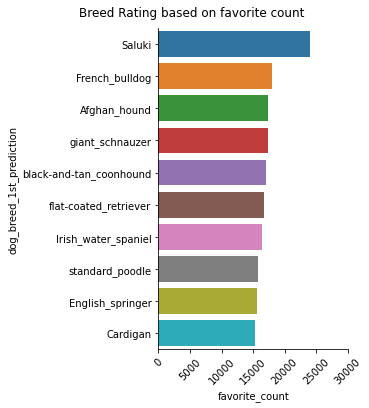

In [85]:
df_v1 = df_master_clean.query('p1_dog == True')
df_v2 = df_v1.filter(['dog_breed_1st_prediction', 'favorite_count'])
df_v3 = df_v2.groupby('dog_breed_1st_prediction').mean()
g = sns.catplot(y = 'dog_breed_1st_prediction', x = 'favorite_count', data = df_v2, kind = 'bar', order= df_v3['favorite_count'].nlargest(10).index, ci = None)
g.fig.suptitle('Breed Rating based on favorite count', y = 1.03)
g.set_xticklabels(rotation = 45)
plt.show()

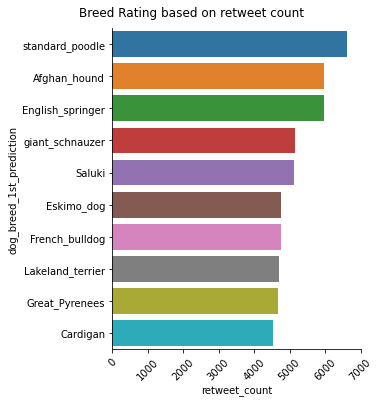

In [86]:
df_v1 = df_master_clean.query('p1_dog == True')
df_v2 = df_v1.filter(['dog_breed_1st_prediction', 'retweet_count'])
df_v3 = df_v2.groupby('dog_breed_1st_prediction').mean()
g = sns.catplot(y = 'dog_breed_1st_prediction', x = 'retweet_count', data = df_v2, kind = 'bar', order= df_v3['retweet_count'].nlargest(10).index, ci = None)
g.fig.suptitle('Breed Rating based on retweet count', y = 1.03)
g.set_xticklabels(rotation = 45)
plt.show()

### Insights:
1. It seems that the median of rating is 11 which is more than the denominator of the rating system (10). It shows that it is overrated.


2. It shows clearly that most of the ratings are above 10 and the highest number of ratings are 12. It shows that the distribution of ratings is left skewed and mean is larger than median. 

3. It seems that in the beginning years, rating ratios were more realistic, while starting at the end of 2016, ratios got overrated exceeding the 10. It is also seen that in 2015 more ratings were generated in comparison to 2017. 

4. It seems that puppers are the highest number among all the dogs rated. 

5. It seems that despite the popularity of puppers, doggos have the highest rating ratios among other stages of the dogs. 

6. It shows that the retrievers are the top breed.

7. It seems that despite popularity of dogs based on the rating ratio counts, popularity of dog breeds differ when compared to retweet count or favourite count. However there are common breeds among favourite and retweet counts holding different position in top 10 rankings: Saluki, French Bulldog, Afghan Hound, Giant Schnauzer, Standard Poodle, English springer, and cardigan 


### References
For completing this project, various sources have been studied and several videos have been watched. 
Despite available material online (i.e. stackoverflow, youtube, toward data science, datacamp, pydata.org), Masterschool's data instructors support and guidelines have been seeked and trainings have been attended. 